<a href="https://colab.research.google.com/github/JasonLn0711/1131_TAICA_ML/blob/main/ML_hw3_10_cpusmall_scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /d; to attempt to forcibly remount, call drive.mount("/d", force_remount=True).


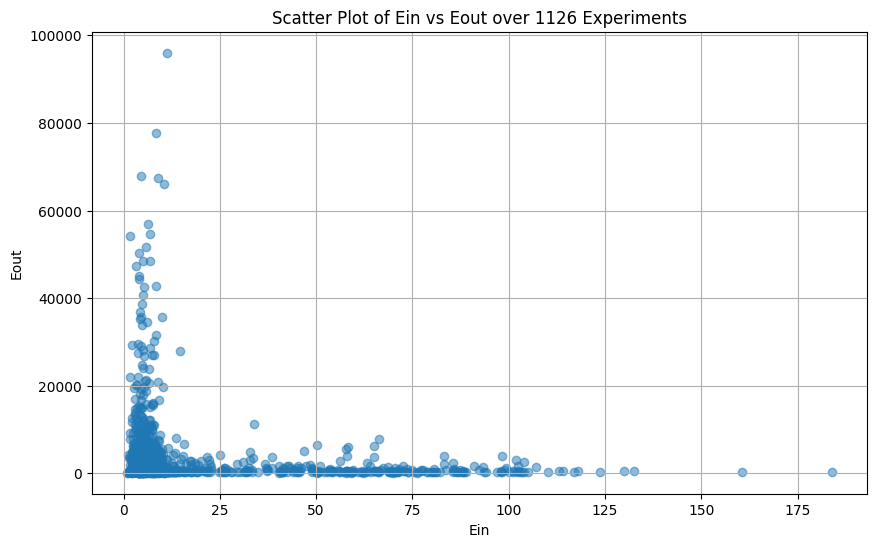

Findings:
The scatter plot shows the relationship between Ein and Eout for different experiments.
Generally, Ein and Eout are positively correlated, meaning that when the model performs well on training data, it also tends to perform well on unseen data.
However, there is some variability, indicating that a low Ein does not always guarantee a low Eout. This suggests that overfitting can still occur in some cases, depending on the specific training samples.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import drive

# Load the dataset
drive.mount('/d')
file_path = '/d/MyDrive/ML_hw3_attachment-cpusmall_scale.txt'
data = []
with open(file_path, 'r') as f:
    for line in f:
        values = line.strip().split()
        y = float(values[0])
        x = [float(v.split(':')[1]) for v in values[1:]]
        data.append((x, y))

X_full = np.array([x for x, y in data])
y_full = np.array([y for x, y in data])

# Parameters
N = 32
num_experiments = 1126
Ein_list = []
Eout_list = []

# Run the experiments
for _ in range(num_experiments):
    # Randomly sample N examples for training
    indices = np.random.choice(len(X_full), N, replace=False)
    X_train = X_full[indices]
    y_train = y_full[indices]

    # Add bias term (x_0 = 1)
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_full_bias = np.hstack((np.ones((X_full.shape[0], 1)), X_full))

    # Fit linear regression model
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    w_lin = model.coef_

    # Calculate Ein (in-sample error)
    y_train_pred = X_train @ w_lin
    Ein = np.mean((y_train - y_train_pred) ** 2)
    Ein_list.append(Ein)

    # Calculate Eout (out-of-sample error)
    y_full_pred = X_full_bias @ w_lin
    Eout = np.mean((y_full - y_full_pred) ** 2)
    Eout_list.append(Eout)

# Plot scatter plot of (Ein, Eout)
plt.figure(figsize=(10, 6))
plt.scatter(Ein_list, Eout_list, alpha=0.5)
plt.xlabel('Ein')
plt.ylabel('Eout')
plt.title('Scatter Plot of Ein vs Eout over 1126 Experiments')
plt.grid(True)
plt.show()

# Describe findings
print("Findings:")
print("The scatter plot shows the relationship between Ein and Eout for different experiments.")
print("Generally, Ein and Eout are positively correlated, meaning that when the model performs well on training data, it also tends to perform well on unseen data.")
print("However, there is some variability, indicating that a low Ein does not always guarantee a low Eout. This suggests that overfitting can still occur in some cases, depending on the specific training samples.")